In [4]:
!git clone https://github.com/aa-amory/KVPExtraction.git

Cloning into 'KVPExtraction'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 0), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [12]:
# Install the Tesseract engine and openCV to be used in python
!pip install pytesseract
!pip install opencv-python
!pip install tesseract

     |████████████████████████████████| 45.6MB 100kB/s 
  Created wheel for tesseract: filename=tesseract-0.1.3-cp37-none-any.whl size=45562571 sha256=c4c6cb55f23041daa48556c5a22975c5604562696bfd893263bcaf77c40338e8
  Stored in directory: /root/.cache/pip/wheels/82/1f/d9/24797b123379e4ea9511cf660835468b62dad609634cad2aba
Successfully built tesseract


In [7]:
# Import the two required libraries
import pytesseract
import cv2

'\nSome available functions from openCV for preprocessing:\n\nMedian filter: median filter blurs out noises by taking the medium from a set of pixels\ncv2.medianBlur()\n\nDilation and erosion: dilation adds pixels to boundaries of pixels, erosion removes it\ncv2.dilate()\ncv2.erode()\ncv2.opening() #This is an erosion followed by a dilation\n'

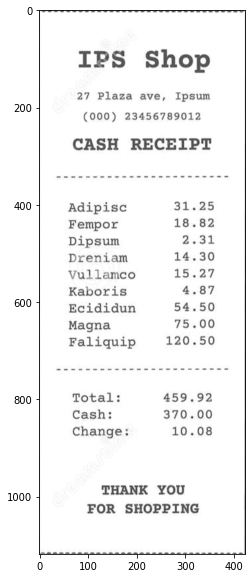

In [8]:
# Load the scanned image of the document, in this case the receipt/invoice
img = cv2.imread('/content/KVPExtraction/invoice.png', 0)
#print(img)
# Visualize the image using matplotlib
from matplotlib import pyplot as plt
plt.figure(figsize = (40,10))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

# Preprocess the images so that it is suitable for the tesseract engine to read
img_out = cv2.threshold(img,185,255,cv2.THRESH_BINARY)[1]


"""
Some available functions from openCV for preprocessing:

Median filter: median filter blurs out noises by taking the medium from a set of pixels
cv2.medianBlur()

Dilation and erosion: dilation adds pixels to boundaries of pixels, erosion removes it
cv2.dilate()
cv2.erode()
cv2.opening() #This is an erosion followed by a dilation
"""

In [ ]:
!sudo apt update
!sudo apt install tesseract-ocr
!sudo apt install libtesseract-dev

In [9]:
"""
Available Retrievalsh Functions from PyTesseract:
pytesseract.image_to_string() # returns the result in a string format
pytesseract.image_to_boxes() # returns result of recognized characters and its bounding boxes
pytesseract.image_to_data() # returns a detailed results containing boundaries and confidences
pytesseract.image_to_osd() # returns result containing orientation and script detection
pytesseract.image_to_alto_xml() # returns result in auto_xml format
pytesseract.run_and_get_output() # returns raw output from the OCR
"""

# Using the tesseract engine to convert the scanned image into texts
document = pytesseract.image_to_string(img_out)
print(document)

IPS Shop

27 Plaza ave, Ipsum

(000) 23456789012

CASH RECEIPT

 

Adipise 31.25
Fempor 18.82
Dipsum 2.31
Dreniam 14.30
Vullamco 15.27
Kaboris 4.87
Ecididun 54.50
Magna 75.00

Faliquip 120.50

Total: 459.92

Cash: 370.00

Change: 10.08
THANK YOU

FOR SHOPPING

 



In [11]:
def extractProductsKVP(document):
    shopList = {}
    beginList = False # Flag to determine whether the list of items purchased has begun

    # Split the document into lines
    for line in document.splitlines(): 

        # Ignore lines where only space are detected
        if line == '' or line.isspace(): 
            continue

        # The list begins when the CASH RECEIPT line is read, and ends when Total is read    
        if 'CASH RECEIPT' in line:
            beginList = True
            continue
        if 'Total' in line:
            beginList = False

        if beginList:
            # Splitting products into key and value
            products = line.split(' ')

            #adding the key and value pair of data
            shopList[products[0]] = products[1]
    return shopList

In [12]:
shopList = extractProductsKVP(document)
print(shopList)

{'Adipise': '31.25', 'Fempor': '18.82', 'Dipsum': '2.31', 'Dreniam': '14.30', 'Vullamco': '15.27', 'Kaboris': '4.87', 'Ecididun': '54.50', 'Magna': '75.00', 'Faliquip': '120.50'}


In [14]:
img = cv2.imread('/content/KVPExtraction/invoice2.png', 0)
img = cv2.threshold(img,185,255,cv2.THRESH_BINARY)[1]
document = pytesseract.image_to_string(img)
shopList2 = extractProductsKVP(document)
print(shopList2)

{'Itaque': '330,85', 'Olefarum': '248,72', 'Ferumetur': '639,58'}


In [15]:
import json
with open('shopList.json', 'w') as fp:
    json.dump(shopList, fp)